<a href="https://colab.research.google.com/github/RafaelR1221/DTSCGroup22/blob/main/Data_Science_Project_Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

ValueError: mount failed

In [ ]:
#import pandas as pd
#url = "https://raw.githubusercontent.com/RafaelR1221/DTSCGroup22/refs/heads/main/states%2B%25281%2529.csv"
##df = pd.read_csv(url)
##df

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
!git clone https://github.com/RafaelR1221/DTSCGroup22.git
%cd DTSCGroup22
df  = pd.read_csv("states+%281%29.csv")
df

Cloning into 'DTSCGroup22'...
remote: Enumerating objects: 15, done.
remote: Counting objects: 100% (15/15), done.
remote: Compressing objects: 100% (11/11), done.
remote: Total 15 (delta 1), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (15/15), 93.09 KiB | 2.22 MiB/s, done.
Resolving deltas: 100% (1/1), done.
/content/DTSCGroup22


,State,Uninsured Rate (2010),Uninsured Rate (2015),Uninsured Rate Change (2010-2015),Health Insurance Coverage Change (2010-2015),Employer Health Insurance Coverage (2015),Marketplace Health Insurance Coverage (2016),Marketplace Tax Credits (2016),Average Monthly Tax Credit (2016),State Medicaid Expansion (2016),Medicaid Enrollment (2013),Medicaid Enrollment (2016),Medicaid Enrollment Change (2013-2016),Medicare Enrollment (2016)
0,Alabama,14.6%,10.1%,-4.5%,215000,2545000,165534,152206,$310,False,799176.0,910775,111599.0,989855
1,Alaska,19.9%,14.9%,-5%,36000,390000,17995,16205,$750,True,122334.0,166625,44291.0,88966
2,Arizona,16.9%,10.8%,-6.1%,410000,3288000,179445,124346,$230,True,1201770.0,1716198,514428.0,1175624
3,Arkansas,17.5%,9.5%,-8%,234000,1365000,63357,56843,$306,True,556851.0,920194,363343.0,606146
4,California,18.5%,8.6%,-9.9%,3826000,19552000,1415428,1239893,$309,True,7755381.0,11843081,4087700.0,5829777
5,Colorado,15.9%,8.1%,-7.8%,419000,2949000,108311,67062,$318,True,783420.0,1375264,591844.0,820234
6,Connecticut,9.1%,6%,-3.1%,110000,2148000,102917,80759,$357,True,NaN,761137,NaN,644136
7,Delaware,9.7%,5.9%,-3.8%,35000,564000,25379,21467,$330,True,223324.0,236702,13378.0,186835
8,District of Columbia,7.6%,3.8%,-3.8%,25000,388000,17666,1224,$183,True,235786.0,255491,19705.0,90492
9,Florida,21.3%,13.3%,-8%,1597000,8847000,1531714,1428712,$305,False,3104996.0,3644673,539677.0,4149593


In [ ]:
df['Medicaid Enrollment (2013)'] = df['Medicaid Enrollment (2013)'].interpolate()
df['Medicaid Enrollment Change (2013-2016)'] = df['Medicaid Enrollment Change (2013-2016)'].interpolate()
df['State Medicaid Expansion (2016)'] = df['State Medicaid Expansion (2016)'].fillna(df['State Medicaid Expansion (2016)'].mode()[0])

print("\nDataset after Interpolation:")
df

<ipython-input-4-dadcf118939d>:3: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['State Medicaid Expansion (2016)'] = df['State Medicaid Expansion (2016)'].fillna(df['State Medicaid Expansion (2016)'].mode()[0])



Dataset after Interpolation:


,State,Uninsured Rate (2010),Uninsured Rate (2015),Uninsured Rate Change (2010-2015),Health Insurance Coverage Change (2010-2015),Employer Health Insurance Coverage (2015),Marketplace Health Insurance Coverage (2016),Marketplace Tax Credits (2016),Average Monthly Tax Credit (2016),State Medicaid Expansion (2016),Medicaid Enrollment (2013),Medicaid Enrollment (2016),Medicaid Enrollment Change (2013-2016),Medicare Enrollment (2016)
0,Alabama,14.6%,10.1%,-4.5%,215000,2545000,165534,152206,$310,False,799176.0,910775,111599.0,989855
1,Alaska,19.9%,14.9%,-5%,36000,390000,17995,16205,$750,True,122334.0,166625,44291.0,88966
2,Arizona,16.9%,10.8%,-6.1%,410000,3288000,179445,124346,$230,True,1201770.0,1716198,514428.0,1175624
3,Arkansas,17.5%,9.5%,-8%,234000,1365000,63357,56843,$306,True,556851.0,920194,363343.0,606146
4,California,18.5%,8.6%,-9.9%,3826000,19552000,1415428,1239893,$309,True,7755381.0,11843081,4087700.0,5829777
5,Colorado,15.9%,8.1%,-7.8%,419000,2949000,108311,67062,$318,True,783420.0,1375264,591844.0,820234
6,Connecticut,9.1%,6%,-3.1%,110000,2148000,102917,80759,$357,True,503372.0,761137,302611.0,644136
7,Delaware,9.7%,5.9%,-3.8%,35000,564000,25379,21467,$330,True,223324.0,236702,13378.0,186835
8,District of Columbia,7.6%,3.8%,-3.8%,25000,388000,17666,1224,$183,True,235786.0,255491,19705.0,90492
9,Florida,21.3%,13.3%,-8%,1597000,8847000,1531714,1428712,$305,False,3104996.0,3644673,539677.0,4149593


^ be able to explain why interpolating was the best way to fill in the dataset and what it does. (For paper) ^

In [ ]:
df = df.iloc[:-1 , [0,3,4,9,12]].copy()
df

,State,Uninsured Rate Change (2010-2015),Health Insurance Coverage Change (2010-2015),State Medicaid Expansion (2016),Medicaid Enrollment Change (2013-2016)
0,Alabama,-4.5%,215000,False,111599.0
1,Alaska,-5%,36000,True,44291.0
2,Arizona,-6.1%,410000,True,514428.0
3,Arkansas,-8%,234000,True,363343.0
4,California,-9.9%,3826000,True,4087700.0
5,Colorado,-7.8%,419000,True,591844.0
6,Connecticut,-3.1%,110000,True,302611.0
7,Delaware,-3.8%,35000,True,13378.0
8,District of Columbia,-3.8%,25000,True,19705.0
9,Florida,-8%,1597000,False,539677.0


array([[<Axes: title={'center': 'Health Insurance Coverage Change (2010-2015)'}>,
        <Axes: title={'center': 'Medicaid Enrollment Change (2013-2016)'}>]],
      dtype=object)

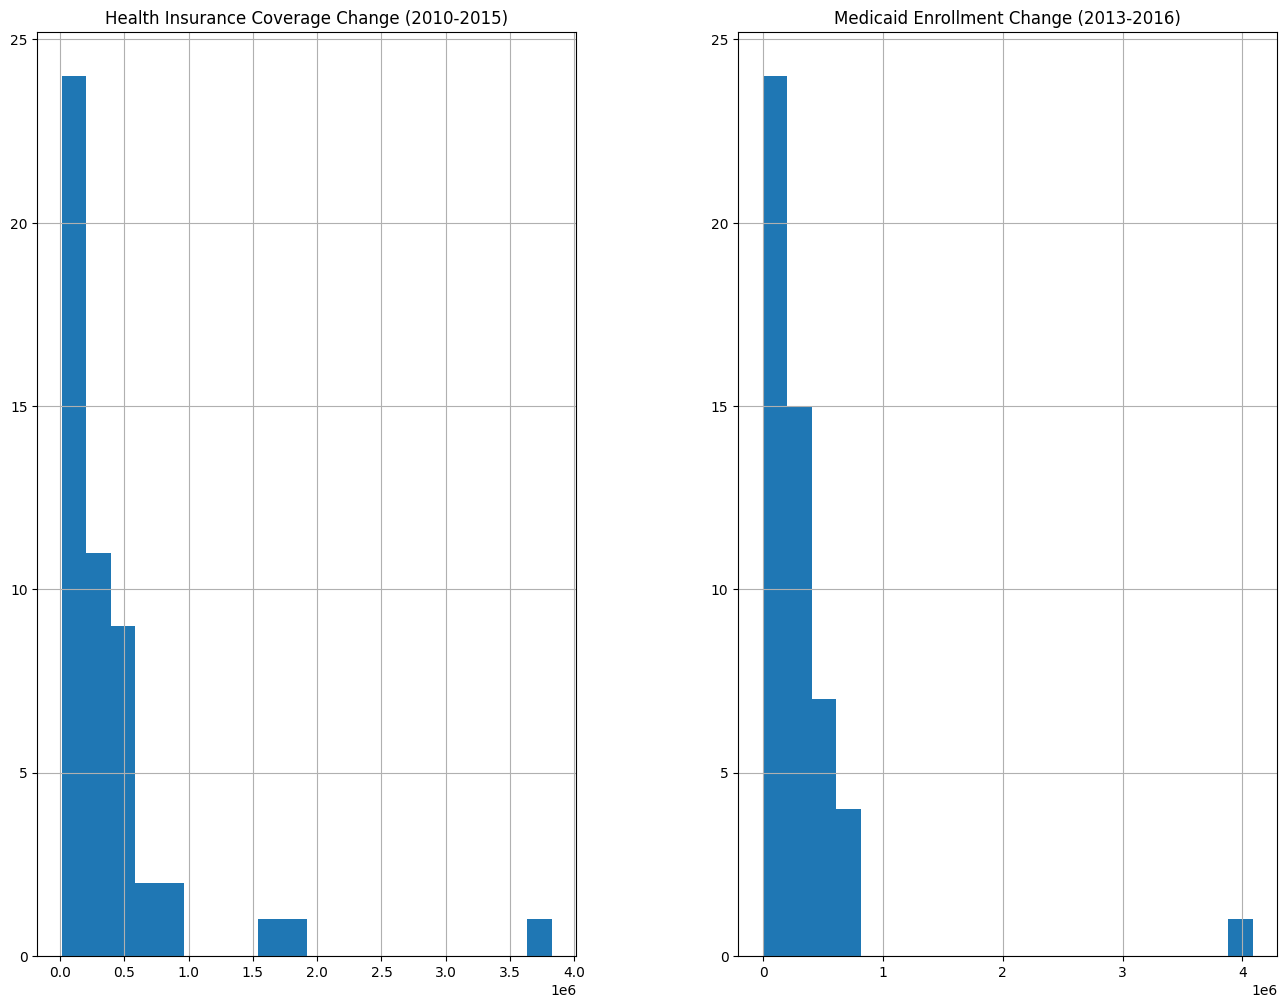

In [ ]:
df.hist(bins=20, figsize=(16, 12))

In [ ]:
df['Uninsured Rate Change (2010-2015)'] = df['Uninsured Rate Change (2010-2015)'].replace('%', '', regex=True).astype(float)/100

df

,State,Uninsured Rate Change (2010-2015),Health Insurance Coverage Change (2010-2015),State Medicaid Expansion (2016),Medicaid Enrollment Change (2013-2016)
0,Alabama,-0.045,215000,False,111599.0
1,Alaska,-0.050,36000,True,44291.0
2,Arizona,-0.061,410000,True,514428.0
3,Arkansas,-0.080,234000,True,363343.0
4,California,-0.099,3826000,True,4087700.0
5,Colorado,-0.078,419000,True,591844.0
6,Connecticut,-0.031,110000,True,302611.0
7,Delaware,-0.038,35000,True,13378.0
8,District of Columbia,-0.038,25000,True,19705.0
9,Florida,-0.080,1597000,False,539677.0


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Initialize the label encoder
label_encoder = LabelEncoder()

# Apply the encoder to the "Category" column
df['State Medicaid Expansion (2016)_Num'] = label_encoder.fit_transform(df['State Medicaid Expansion (2016)'])
print("\nDataFrame after Label Encoding:")
df #true == 1 & false ==0



DataFrame after Label Encoding:


,State,Uninsured Rate Change (2010-2015),Health Insurance Coverage Change (2010-2015),State Medicaid Expansion (2016),Medicaid Enrollment Change (2013-2016),State Medicaid Expansion (2016)_Num
0,Alabama,-0.045,215000,False,111599.0,0
1,Alaska,-0.050,36000,True,44291.0,1
2,Arizona,-0.061,410000,True,514428.0,1
3,Arkansas,-0.080,234000,True,363343.0,1
4,California,-0.099,3826000,True,4087700.0,1
5,Colorado,-0.078,419000,True,591844.0,1
6,Connecticut,-0.031,110000,True,302611.0,1
7,Delaware,-0.038,35000,True,13378.0,1
8,District of Columbia,-0.038,25000,True,19705.0,1
9,Florida,-0.080,1597000,False,539677.0,0


In [ ]:
df_1 = df.drop(columns = ['State',"State Medicaid Expansion (2016)"])

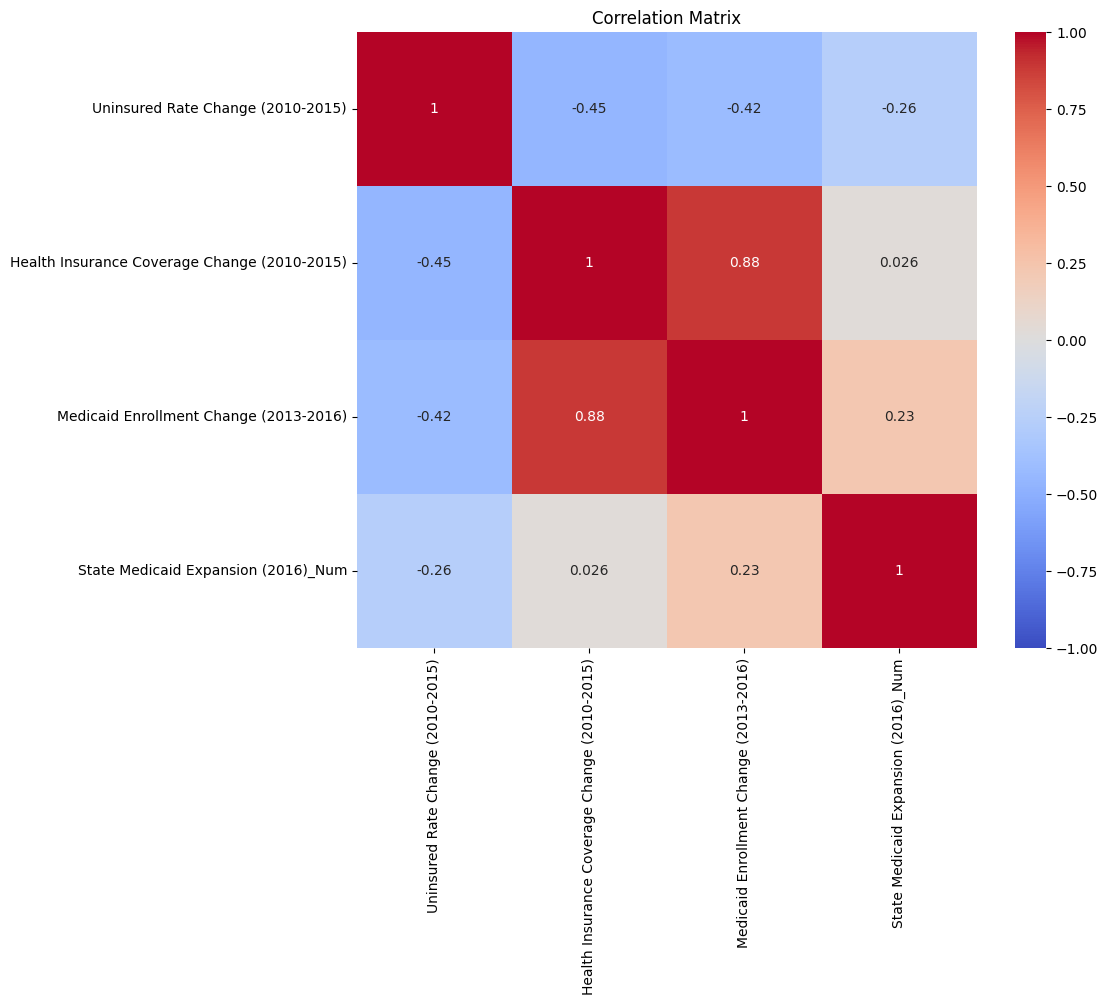

In [ ]:
correlation_matrix = df_1.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(df_1.corr(), annot= True , cmap ="coolwarm", vmin=-1, vmax= 1)
plt.title('Correlation Matrix')
plt.show()


In [ ]:
df_2 = df.copy()
df_2

,State,Uninsured Rate Change (2010-2015),Health Insurance Coverage Change (2010-2015),State Medicaid Expansion (2016),Medicaid Enrollment Change (2013-2016),State Medicaid Expansion (2016)_Num
0,Alabama,-0.045,215000,False,111599.0,0
1,Alaska,-0.050,36000,True,44291.0,1
2,Arizona,-0.061,410000,True,514428.0,1
3,Arkansas,-0.080,234000,True,363343.0,1
4,California,-0.099,3826000,True,4087700.0,1
5,Colorado,-0.078,419000,True,591844.0,1
6,Connecticut,-0.031,110000,True,302611.0,1
7,Delaware,-0.038,35000,True,13378.0,1
8,District of Columbia,-0.038,25000,True,19705.0,1
9,Florida,-0.080,1597000,False,539677.0,0


Mean Uninsured Rate Change by Medicaid Expansion Status:
State Medicaid Expansion (2016)_Num
0   -0.047211
1   -0.058563
Name: Uninsured Rate Change (2010-2015), dtype: float64


<ipython-input-22-a085d4e99b58>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


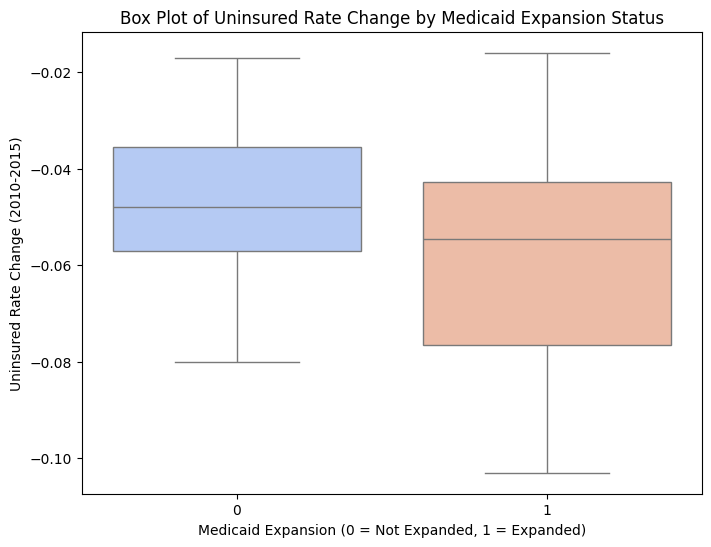

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Group data by Medicaid Expansion Status and calculate mean uninsured rate change
mean_uninsured_rate_change = df_2.groupby("State Medicaid Expansion (2016)_Num")["Uninsured Rate Change (2010-2015)"].mean()

# Display mean uninsured rate change
print("Mean Uninsured Rate Change by Medicaid Expansion Status:")
print(mean_uninsured_rate_change)

# Box plot of Uninsured Rate Change grouped by Medicaid Expansion
plt.figure(figsize=(8, 6))
sns.boxplot(
    x="State Medicaid Expansion (2016)_Num",
    y="Uninsured Rate Change (2010-2015)",
    data=df_2,
    palette="coolwarm"
)
plt.title("Box Plot of Uninsured Rate Change by Medicaid Expansion Status")
plt.xlabel("Medicaid Expansion (0 = Not Expanded, 1 = Expanded)")
plt.ylabel("Uninsured Rate Change (2010-2015)")
plt.show()


Mean Uninsured Rate Change by Medicaid Expansion Status:
 State Medicaid Expansion (2016)_Num
0   -0.047211
1   -0.058563
Name: Uninsured Rate Change (2010-2015), dtype: float64


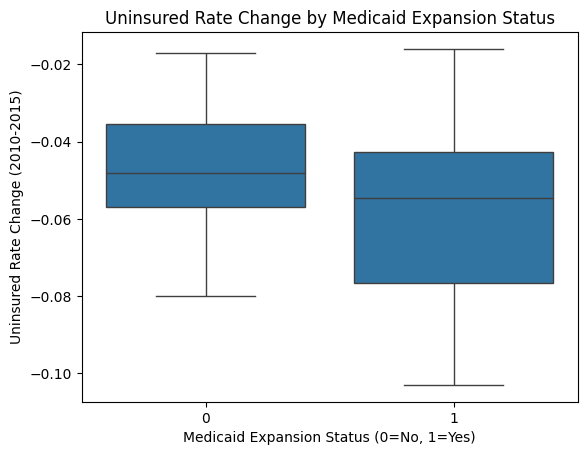

Correlation between Medicaid Expansion and Uninsured Rate Change:
                                      State Medicaid Expansion (2016)_Num  \
State Medicaid Expansion (2016)_Num                             1.000000   
Uninsured Rate Change (2010-2015)                              -0.259846   

                                     Uninsured Rate Change (2010-2015)  
State Medicaid Expansion (2016)_Num                          -0.259846  
Uninsured Rate Change (2010-2015)                             1.000000  
Regression Analysis Summary:
                                     OLS Regression Results                                   
Dep. Variable:     Uninsured Rate Change (2010-2015)   R-squared:                       0.205
Model:                                           OLS   Adj. R-squared:                  0.172
Method:                                Least Squares   F-statistic:                     6.183
Date:                               Fri, 29 Nov 2024   Prob (F-statistic):     

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from scipy.stats import ttest_ind

# Load dataset
data = df_2.copy()  # Replace with your actual file path

#Ensure 'State Medicaid Expansion (2016)_Num' column is treated as numerical
data['State Medicaid Expansion (2016)_Num'] = data['State Medicaid Expansion (2016)_Num'].astype(int)

### 1. Descriptive Statistics and Visualization

# Group data by Medicaid Expansion Status and calculate mean uninsured rate change
grouped_data = data.groupby('State Medicaid Expansion (2016)_Num')['Uninsured Rate Change (2010-2015)'].mean()
print("Mean Uninsured Rate Change by Medicaid Expansion Status:\n", grouped_data)

# Box plot of Uninsured Rate Change grouped by Medicaid Expansion
sns.boxplot(x='State Medicaid Expansion (2016)_Num', y='Uninsured Rate Change (2010-2015)', data=data)
plt.xlabel('Medicaid Expansion Status (0=No, 1=Yes)')
plt.ylabel('Uninsured Rate Change (2010-2015)')
plt.title('Uninsured Rate Change by Medicaid Expansion Status')
plt.show()

### 2. Correlation and Regression Analysis

# Correlation Analysis
correlation = data[['State Medicaid Expansion (2016)_Num', 'Uninsured Rate Change (2010-2015)']].corr()
print("Correlation between Medicaid Expansion and Uninsured Rate Change:\n", correlation)

# Regression Analysis
# Set up independent (X) and dependent (y) variables for regression
X = data[['State Medicaid Expansion (2016)_Num', 'Medicaid Enrollment Change (2013-2016)']]
X = sm.add_constant(X)  # Adds an intercept to the model
y = data['Uninsured Rate Change (2010-2015)']

# Perform the regression
model = sm.OLS(y, X).fit()
print("Regression Analysis Summary:\n", model.summary())

### 3. T-Test Analysis

# Separate data into two groups based on Medicaid expansion status
expansion = data[data['State Medicaid Expansion (2016)_Num'] == 1]['Uninsured Rate Change (2010-2015)']
no_expansion = data[data['State Medicaid Expansion (2016)_Num'] == 0]['Uninsured Rate Change (2010-2015)']

# Perform an independent t-test
t_stat, p_value = ttest_ind(expansion, no_expansion)
print(f"T-test results: t-statistic = {t_stat}, p-value = {p_value}")

### 4. Difference-in-Differences (DID) Analysis
# Assumes you have data for pre-2010 and post-2015 uninsured rates for DID analysis
# Replace 'Uninsured Rate (pre-2010)' and 'Uninsured Rate (post-2015)' with your column names if available

if 'Uninsured Rate (pre-2010)' in data.columns and 'Uninsured Rate (post-2015)' in data.columns:
    data['Pre-Post Change'] = data['Uninsured Rate (post-2015)'] - data['Uninsured Rate (pre-2010)']

    # Set up DID variables: treatment, time, and interaction term
    data['Treatment'] = data['State Medicaid Expansion (2016)_Num']
    data['Post'] = 1  # Assuming all data is post-expansion period

    # Regression model for DID
    X_did = data[['Treatment', 'Post']]
    X_did['Interaction'] = data['Treatment'] * data['Post']  # Interaction term
    X_did = sm.add_constant(X_did)
    y_did = data['Pre-Post Change']

    # Run DID regression
    did_model = sm.OLS(y_did, X_did).fit()
    print("Difference-in-Differences Analysis Summary:\n", did_model.summary())
else:
    print("DID analysis requires 'Uninsured Rate (pre-2010)' and 'Uninsured Rate (post-2015)' columns in the dataset.")



In [ ]:
import pandas as pd

# Define regions
regions = {
    'Northeast': ['Connecticut', 'Maine', 'Massachusetts', 'New Hampshire', 'New Jersey', 'New York', 'Pennsylvania', 'Rhode Island', 'Vermont'],
    'Midwest': ['Illinois', 'Indiana', 'Iowa', 'Kansas', 'Michigan', 'Minnesota', 'Missouri', 'Nebraska', 'North Dakota', 'Ohio', 'South Dakota', 'Wisconsin'],
    'South': ['Alabama', 'Arkansas', 'Delaware', 'District of Columbia', 'Florida', 'Georgia', 'Kentucky', 'Louisiana', 'Maryland', 'Mississippi', 'North Carolina', 'Oklahoma', 'South Carolina', 'Tennessee', 'Texas', 'Virginia', 'West Virginia'],
    'West': ['Alaska', 'Arizona', 'California', 'Colorado', 'Hawaii', 'Idaho', 'Montana', 'Nevada', 'New Mexico', 'Oregon', 'Utah', 'Washington', 'Wyoming']
}

# Sample data
data = df_2

# Optional: Handle state abbreviations
state_abbreviations = {
    'AL': 'Alabama', 'AK': 'Alaska', 'AZ': 'Arizona', 'AR': 'Arkansas', 'CA': 'California',
    'CT': 'Connecticut', 'DE': 'Delaware', 'DC': 'District of Columbia', 'FL': 'Florida',
    'GA': 'Georgia', 'HI': 'Hawaii', 'ID': 'Idaho', 'IL': 'Illinois', 'IN': 'Indiana',
    'IA': 'Iowa', 'KS': 'Kansas', 'KY': 'Kentucky', 'LA': 'Louisiana', 'ME': 'Maine',
    'MD': 'Maryland', 'MA': 'Massachusetts', 'MI': 'Michigan', 'MN': 'Minnesota',
    'MS': 'Mississippi', 'MO': 'Missouri', 'MT': 'Montana', 'NE': 'Nebraska', 'NV': 'Nevada',
    'NH': 'New Hampshire', 'NJ': 'New Jersey', 'NM': 'New Mexico', 'NY': 'New York',
    'NC': 'North Carolina', 'ND': 'North Dakota', 'OH': 'Ohio', 'OK': 'Oklahoma',
    'OR': 'Oregon', 'PA': 'Pennsylvania', 'RI': 'Rhode Island', 'SC': 'South Carolina',
    'SD': 'South Dakota', 'TN': 'Tennessee', 'TX': 'Texas', 'UT': 'Utah', 'VT': 'Vermont',
    'VA': 'Virginia', 'WA': 'Washington', 'WV': 'West Virginia', 'WI': 'Wisconsin',
    'WY': 'Wyoming'
}

# Normalize state names
data['State'] = data['State'].str.strip()  # Remove leading/trailing spaces
data['State'] = data['State'].str.title()  # Convert to title case
data['State'] = data['State'].replace(state_abbreviations)  # Replace abbreviations with full names

# Function to assign region
def assign_region(state):
    for region, states in regions.items():
        if state in states:
            return region
    return 'Unknown'

# Apply the function to assign regions
data['Region'] = data['State'].apply(assign_region)

# Display the updated DataFrame



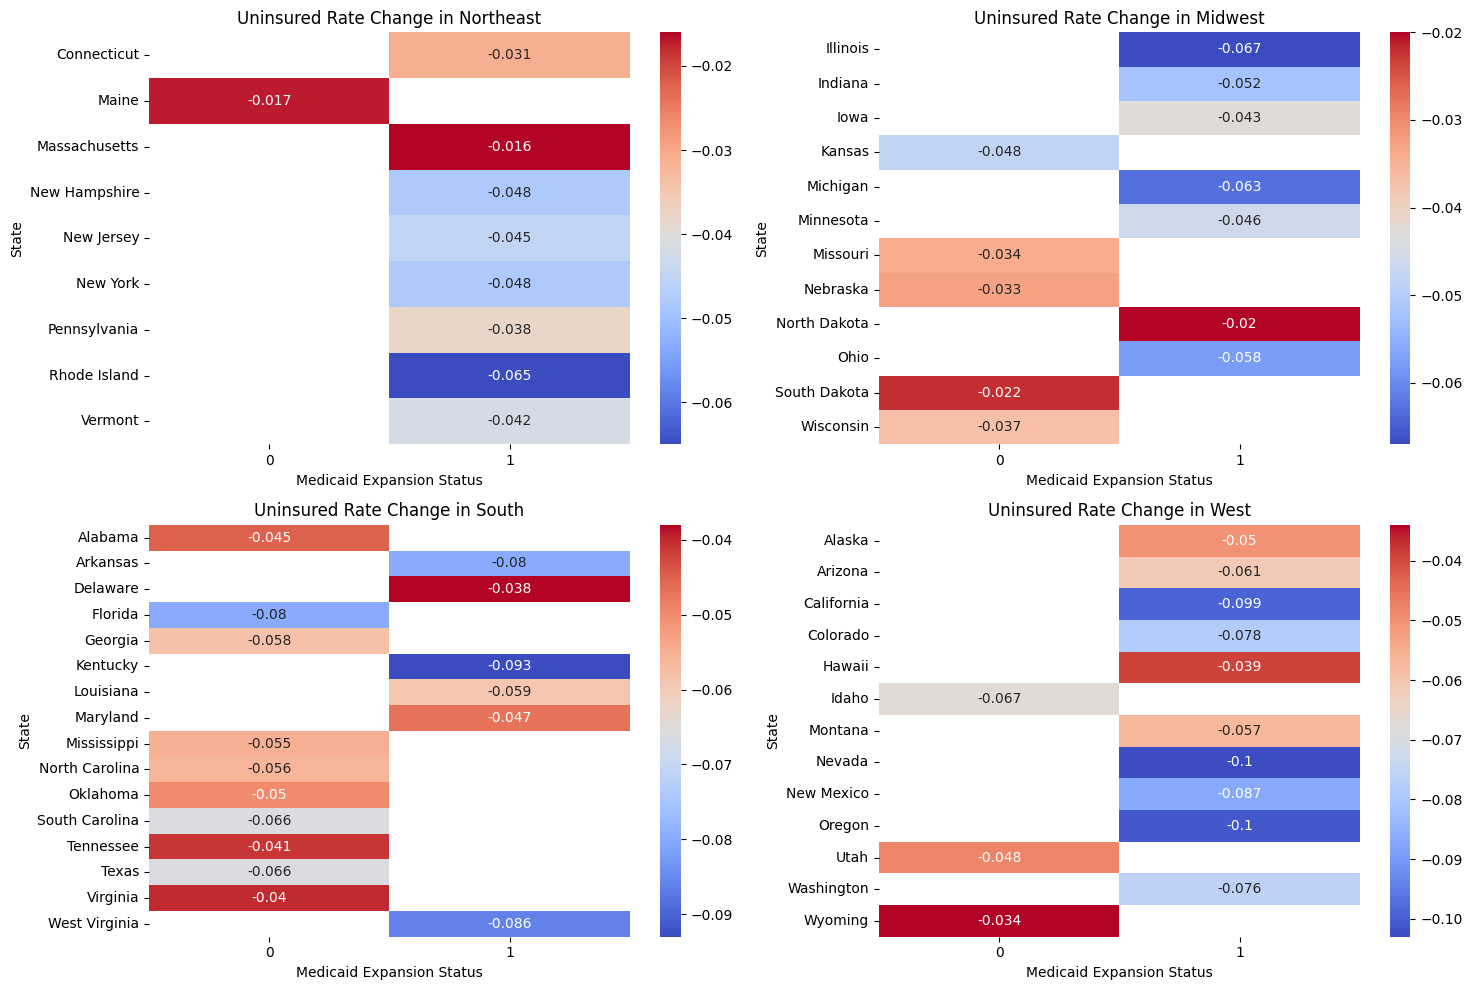

In [ ]:
# prompt: create 4 heatmaps that divide states into 4 regions that showing the uninsured rate changes by region (Northeast, Midwest, South, and West) with distinctions based on Medicaid expansion status could effectively illustrate whether regional patterns of Medicaid expansion are associated with reductions in uninsured rates. use the state column and the state_expanison_num column in df_2 it should include all 50 states from df_2

import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df_2 and regions dictionary are defined as in the previous code
regions = {
    'Northeast': ['Connecticut', 'Maine', 'Massachusetts', 'New Hampshire', 'New Jersey', 'New York', 'Pennsylvania', 'Rhode Island', 'Vermont'],
    'Midwest': ['Illinois', 'Indiana', 'Iowa', 'Kansas', 'Michigan', 'Minnesota', 'Missouri', 'Nebraska', 'North Dakota', 'Ohio', 'South Dakota', 'Wisconsin'],
    'South': ['Alabama', 'Arkansas', 'Delaware', 'District of Columbia', 'Florida', 'Georgia', 'Kentucky', 'Louisiana', 'Maryland', 'Mississippi', 'North Carolina', 'Oklahoma', 'South Carolina', 'Tennessee', 'Texas', 'Virginia', 'West Virginia'],
    'West': ['Alaska', 'Arizona', 'California', 'Colorado', 'Hawaii', 'Idaho', 'Montana', 'Nevada', 'New Mexico', 'Oregon', 'Utah', 'Washington', 'Wyoming']
}

# Sample data: Replace with your full dataset
data = df_2.copy()
# Function to assign region
def assign_region(state):
    for region, states in regions.items():
        if state in states:
            return region
    return 'Unknown'

# Apply the function to assign regions and add 'Region' column to df_2
df_2['Region'] = df_2['State'].apply(assign_region) #This is the line added

# Function to create heatmaps for each region
def create_region_heatmaps(data, regions):
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    axes = axes.flatten()

    for i, region_name in enumerate(regions):
        # Filter data for the current region
        region_data = data[data['Region'] == region_name]

        # Pivot the data for the heatmap
        heatmap_data = region_data.pivot(index='State', columns='State Medicaid Expansion (2016)_Num', values='Uninsured Rate Change (2010-2015)')

        # Create the heatmap
        sns.heatmap(heatmap_data, annot=True, cmap='coolwarm', ax=axes[i])
        axes[i].set_title(f'Uninsured Rate Change in {region_name}')
        axes[i].set_xlabel('Medicaid Expansion Status')

    plt.tight_layout()
    plt.show()

# Call the function to create the heatmaps
create_region_heatmaps(df_2, ['Northeast', 'Midwest', 'South', 'West'])

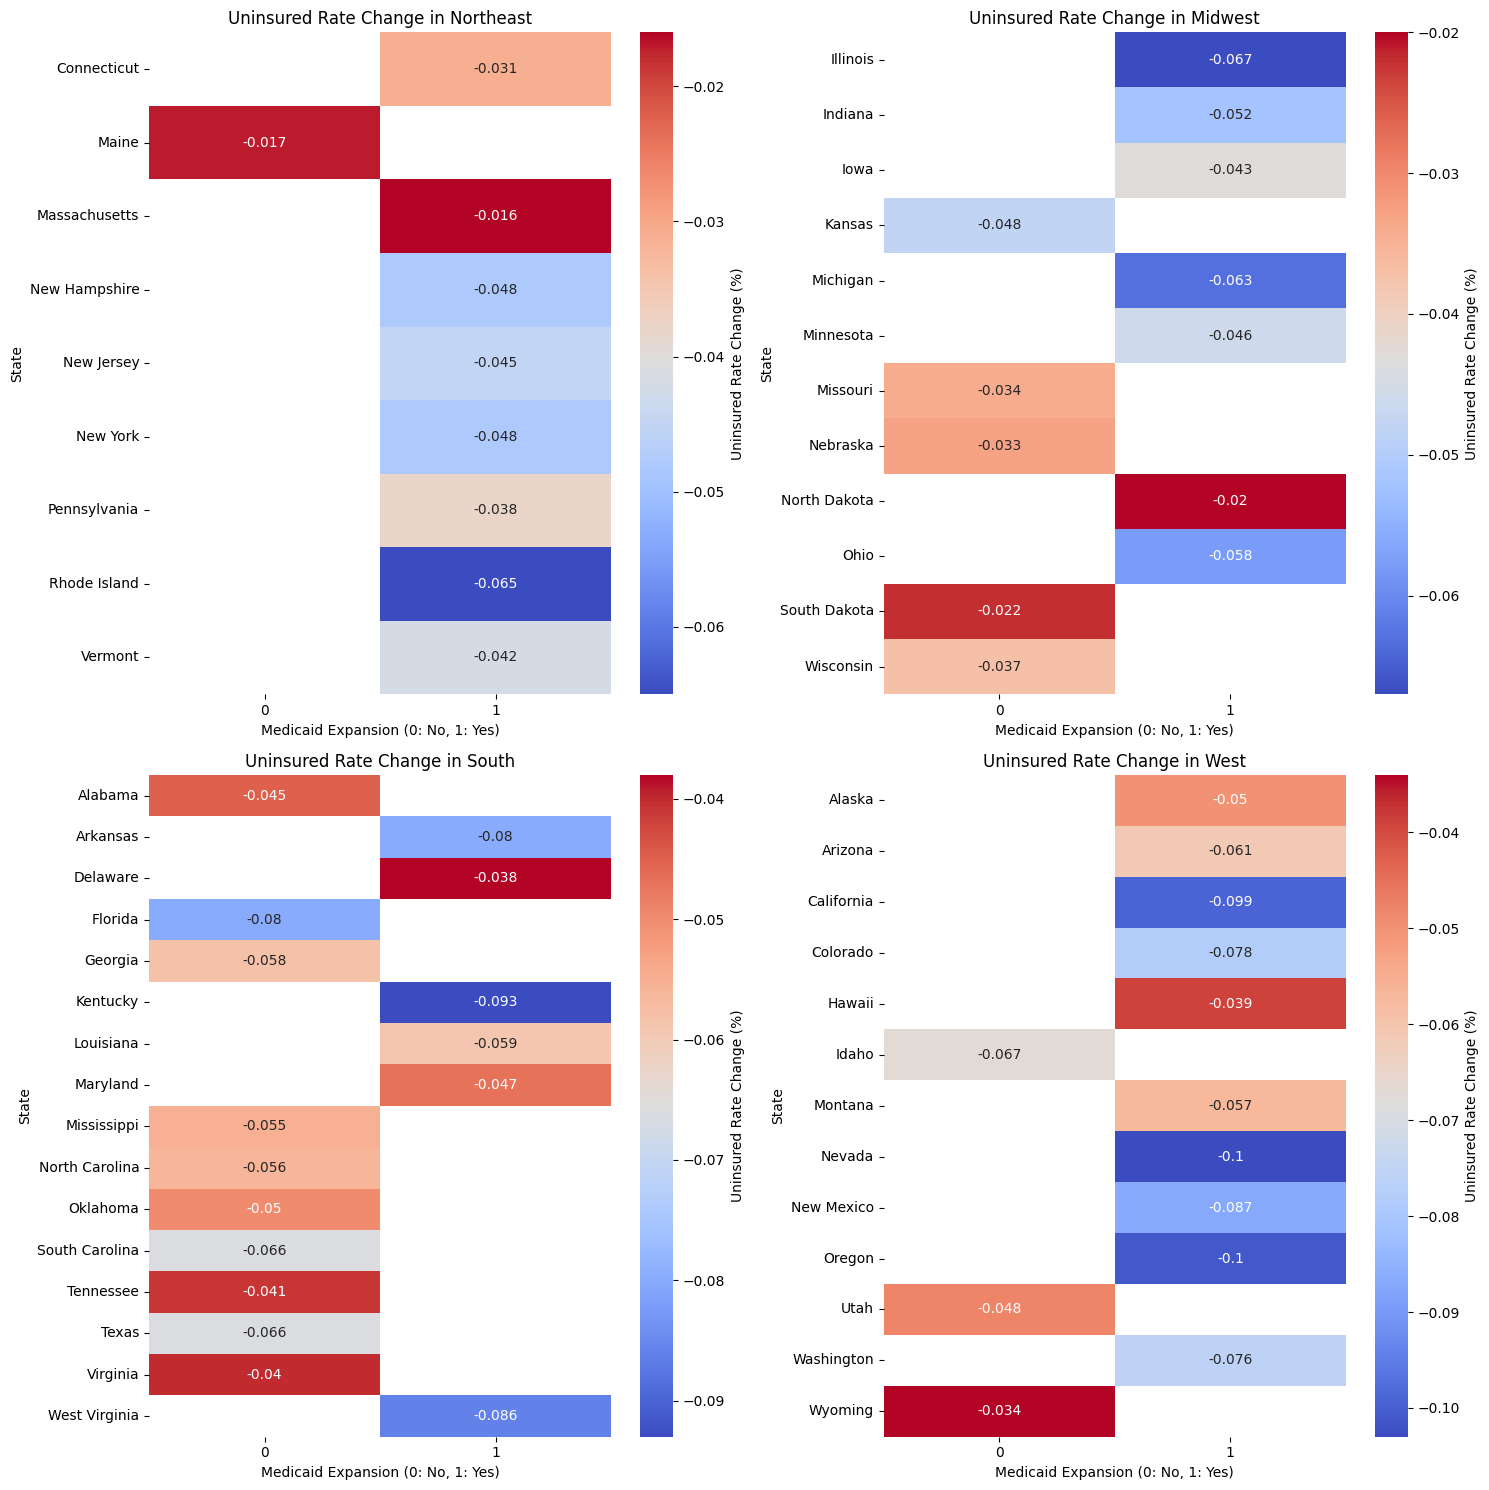

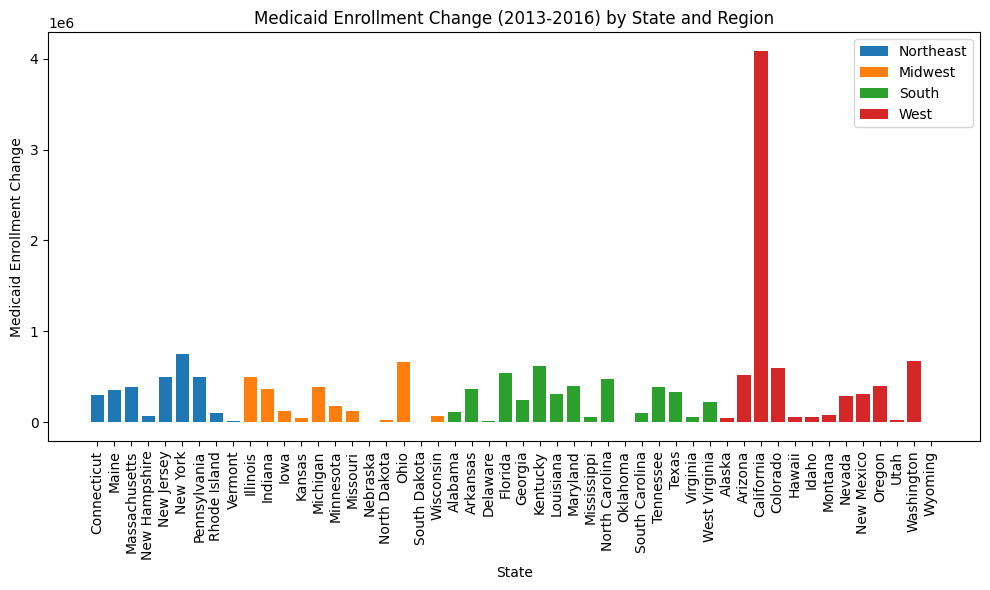

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df_2 and regions dictionary are defined as in the previous code
regions = {
    'Northeast': ['Connecticut', 'Maine', 'Massachusetts', 'New Hampshire', 'New Jersey', 'New York', 'Pennsylvania', 'Rhode Island', 'Vermont'],
    'Midwest': ['Illinois', 'Indiana', 'Iowa', 'Kansas', 'Michigan', 'Minnesota', 'Missouri', 'Nebraska', 'North Dakota', 'Ohio', 'South Dakota', 'Wisconsin'],
    'South': ['Alabama', 'Arkansas', 'Delaware', 'District of Columbia', 'Florida', 'Georgia', 'Kentucky', 'Louisiana', 'Maryland', 'Mississippi', 'North Carolina', 'Oklahoma', 'South Carolina', 'Tennessee', 'Texas', 'Virginia', 'West Virginia'],
    'West': ['Alaska', 'Arizona', 'California', 'Colorado', 'Hawaii', 'Idaho', 'Montana', 'Nevada', 'New Mexico', 'Oregon', 'Utah', 'Washington', 'Wyoming']
}

# Sample data: Replace with your full dataset
data = df_2.copy()
# Function to create regional heatmaps and visualize Medicaid Enrollment Change
def create_region_heatmaps_and_visualize(data, regions):
    fig, axes = plt.subplots(2, 2, figsize=(15, 15))
    axes = axes.flatten()

    for i, region_name in enumerate(regions):
        # Filter data for the current region
        region_data = data[data['Region'] == region_name]

        if region_data.empty:  # Skip if no data for the region
            axes[i].set_title(f'No Data for {region_name}')
            axes[i].axis('off')
            continue

        # Create pivot table for heatmap
        heatmap_data = region_data.pivot(index='State', columns='State Medicaid Expansion (2016)_Num', values='Uninsured Rate Change (2010-2015)')

        # Heatmap for uninsured rate change
        sns.heatmap(heatmap_data, annot=True, cmap='coolwarm', ax=axes[i], cbar_kws={'label': 'Uninsured Rate Change (%)'})
        axes[i].set_title(f'Uninsured Rate Change in {region_name}')
        axes[i].set_xlabel('Medicaid Expansion (0: No, 1: Yes)')
        axes[i].set_ylabel('State')

    plt.tight_layout()
    plt.show()

    # Visualization for Medicaid Enrollment Change by Region
    plt.figure(figsize=(10, 6))
    for region_name in regions:
        region_data = data[data['Region'] == region_name]
        if not region_data.empty:  # Plot only if data exists for the region
            plt.bar(region_data['State'], region_data['Medicaid Enrollment Change (2013-2016)'], label=region_name)

    plt.title('Medicaid Enrollment Change (2013-2016) by State and Region')
    plt.xlabel('State')
    plt.ylabel('Medicaid Enrollment Change')
    plt.legend()
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

# Call the function to create the heatmaps and visualize enrollment changes
create_region_heatmaps_and_visualize(df_2, ['Northeast', 'Midwest', 'South', 'West'])



Evaluation Metrics for Logistic Regression:
Accuracy: 0.6364
Precision: 0.7143
Recall: 0.7143
F1-score: 0.7143
ROC AUC: 0.7857

Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.50      0.50         4
           1       0.71      0.71      0.71         7

    accuracy                           0.64        11
   macro avg       0.61      0.61      0.61        11
weighted avg       0.64      0.64      0.64        11



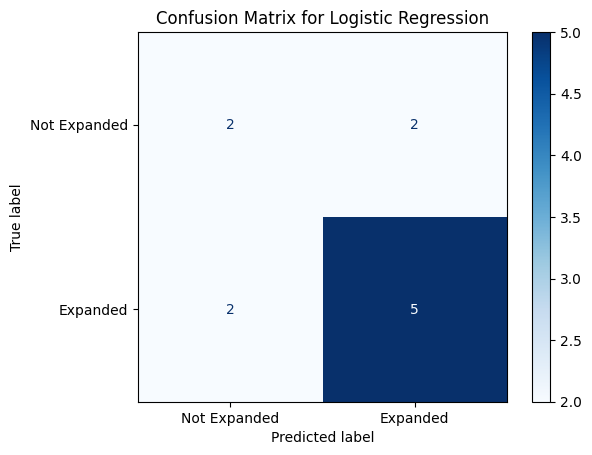


Evaluation Metrics for Decision Tree:
Accuracy: 0.4545
Precision: 0.6667
Recall: 0.2857
F1-score: 0.4000
ROC AUC: 0.5179

Classification Report:
               precision    recall  f1-score   support

           0       0.38      0.75      0.50         4
           1       0.67      0.29      0.40         7

    accuracy                           0.45        11
   macro avg       0.52      0.52      0.45        11
weighted avg       0.56      0.45      0.44        11



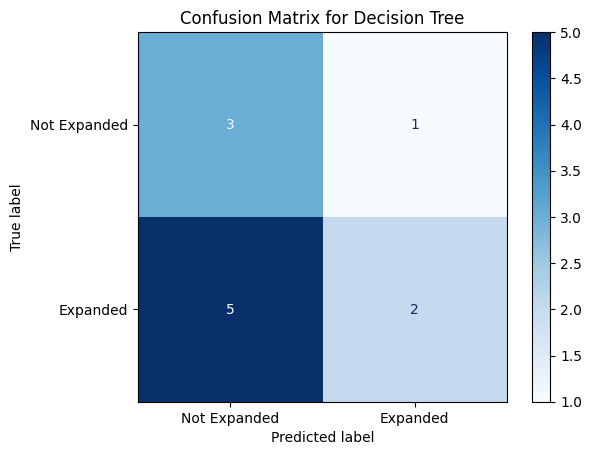

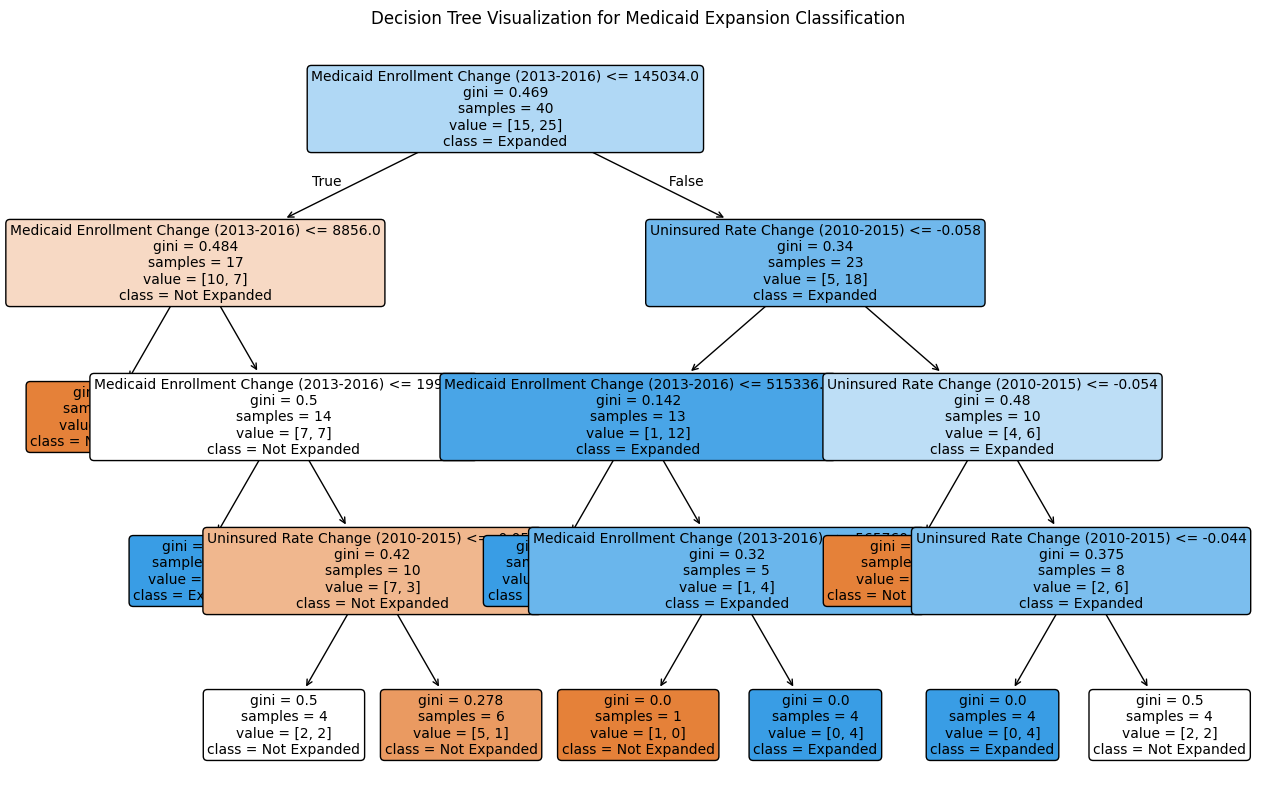

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, classification_report, confusion_matrix,
    ConfusionMatrixDisplay
)

# Load or define df_2 here (placeholder)
# Example: df_2 = pd.read_csv("path_to_dataset.csv")

# Define feature matrix and target variable
X = df_2[["Uninsured Rate Change (2010-2015)", "Medicaid Enrollment Change (2013-2016)"]]
y = df_2["State Medicaid Expansion (2016)_Num"]

# Split the dataset with stratification to maintain class distribution
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Train Logistic Regression and Decision Tree Models
logreg_clf = LogisticRegression(random_state=42, max_iter=1000)
logreg_clf.fit(X_train, y_train)

tree_clf = DecisionTreeClassifier(max_depth=4, random_state=42)
tree_clf.fit(X_train, y_train)

# Custom Evaluation Function
def evaluate_model(y_true, y_pred, model, model_name):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, zero_division=0)
    recall = recall_score(y_true, y_pred, zero_division=0)
    f1 = f1_score(y_true, y_pred, zero_division=0)

    # ROC AUC (if probabilities are available)
    if hasattr(model, "predict_proba"):
        y_pred_proba = model.predict_proba(X_test)[:, 1]
        roc_auc = roc_auc_score(y_true, y_pred_proba)
    else:
        roc_auc = roc_auc_score(y_true, y_pred)

    # Print Metrics
    print(f"\nEvaluation Metrics for {model_name}:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-score: {f1:.4f}")
    print(f"ROC AUC: {roc_auc:.4f}")
    print("\nClassification Report:\n", classification_report(y_true, y_pred))

    # Confusion Matrix
    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Not Expanded", "Expanded"])
    disp.plot(cmap="Blues", values_format="d")
    plt.title(f"Confusion Matrix for {model_name}")
    plt.show()

# Evaluate Logistic Regression
y_pred_logreg = logreg_clf.predict(X_test)
evaluate_model(y_test, y_pred_logreg, logreg_clf, "Logistic Regression")

# Evaluate Decision Tree
y_pred_tree = tree_clf.predict(X_test)
evaluate_model(y_test, y_pred_tree, tree_clf, "Decision Tree")

# Visualize Decision Tree
plt.figure(figsize=(16, 10))
plot_tree(tree_clf,
          feature_names=X.columns,
          class_names=["Not Expanded", "Expanded"],
          filled=True, rounded=True, fontsize=10)
plt.title("Decision Tree Visualization for Medicaid Expansion Classification")
plt.show()



Evaluation Metrics for Logistic Regression:
Accuracy: 0.6364
Precision: 0.7143
Recall: 0.7143
F1 Score: 0.7143
ROC AUC: 0.7857


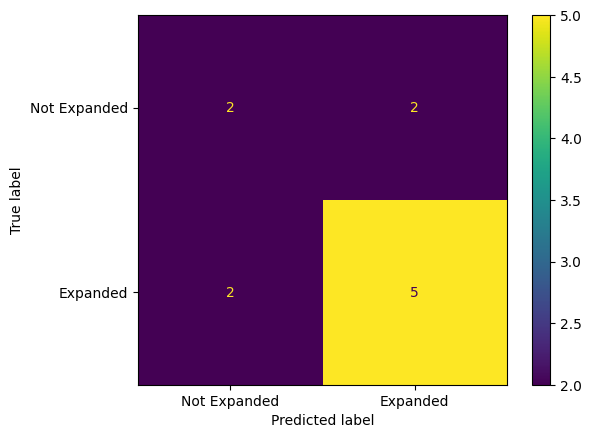

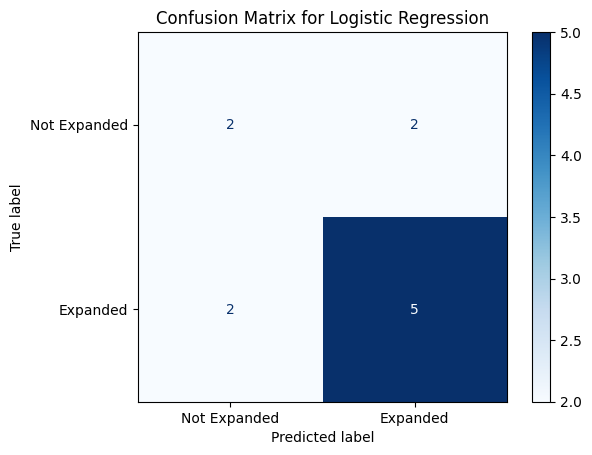


Evaluation Metrics for Decision Tree:
Accuracy: 0.4545
Precision: 0.6667
Recall: 0.2857
F1 Score: 0.4000
ROC AUC: 0.5179


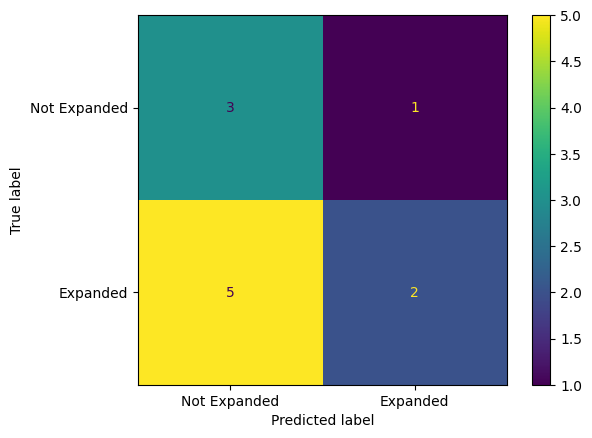

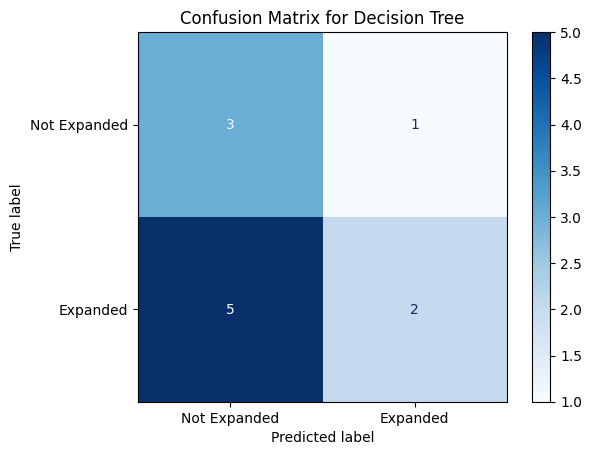

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, ConfusionMatrixDisplay
)

# Load the dataset

# Define features and target
X = df_2[["Uninsured Rate Change (2010-2015)", "Medicaid Enrollment Change (2013-2016)"]]
y = df_2["State Medicaid Expansion (2016)_Num"]

# Split the dataset with stratification
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Logistic Regression
log_reg = LogisticRegression(random_state=42, max_iter=1000)
log_reg.fit(X_train, y_train)
y_pred_logreg = log_reg.predict(X_test)
y_pred_logreg_proba = log_reg.predict_proba(X_test)[:, 1]

# Decision Tree
tree_clf = DecisionTreeClassifier(max_depth=4, random_state=42)
tree_clf.fit(X_train, y_train)
y_pred_tree = tree_clf.predict(X_test)

# Evaluation Function
def evaluate_model(y_true, y_pred, y_pred_proba=None, model_name="Model"):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, zero_division=0)
    recall = recall_score(y_true, y_pred, zero_division=0)
    f1 = f1_score(y_true, y_pred, zero_division=0)
    roc_auc = roc_auc_score(y_true, y_pred_proba if y_pred_proba is not None else y_pred)

    print(f"\nEvaluation Metrics for {model_name}:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"ROC AUC: {roc_auc:.4f}")

    # Confusion Matrix
    disp = ConfusionMatrixDisplay.from_predictions(y_true, y_pred, display_labels=["Not Expanded", "Expanded"])
    disp.plot(cmap="Blues", values_format="d")
    plt.title(f"Confusion Matrix for {model_name}")
    plt.show()

# Evaluate Logistic Regression
evaluate_model(y_test, y_pred_logreg, y_pred_logreg_proba, model_name="Logistic Regression")

# Evaluate Decision Tree
evaluate_model(y_test, y_pred_tree, None, model_name="Decision Tree")


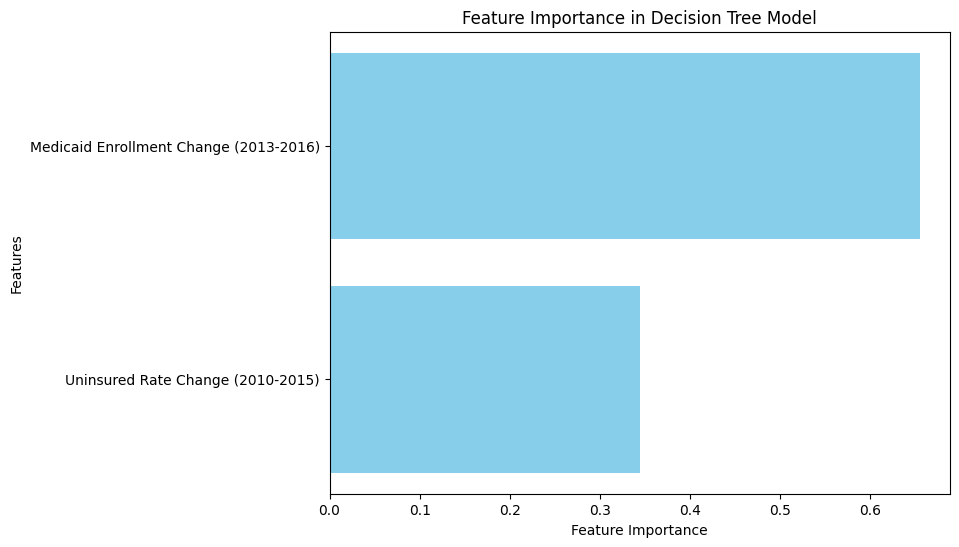

,Feature,Importance
1,Medicaid Enrollment Change (2013-2016),0.655037
0,Uninsured Rate Change (2010-2015),0.344963


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np #"Health Insurance Coverage Change (2010-2015)"

# Assuming df_2 is already loaded and contains the necessary columns

# Define features and target for classification
X = df_2[["Uninsured Rate Change (2010-2015)",
          "Medicaid Enrollment Change (2013-2016)"

          ]]
y = df_2["State Medicaid Expansion (2016)_Num"]  # Target: Expanded or Not Expanded (1 or 0)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,stratify=y
)


# Train the decision tree classifier
tree_clf = DecisionTreeClassifier(max_depth=4, random_state=42)
tree_clf.fit(X_train, y_train)

# Get feature importance
feature_importances = tree_clf.feature_importances_

# Create a bar chart for feature importance
plt.figure(figsize=(8, 6))
plt.barh(X.columns, feature_importances, color="skyblue")
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Feature Importance in Decision Tree Model")
plt.show()

# Display feature importance as a DataFrame
importance_df = pd.DataFrame({
    "Feature": X.columns,
    "Importance": feature_importances
}).sort_values(by="Importance", ascending=False)

importance_df

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score

# Load your dataset
# Replace with your dataset
# df = pd.read_csv("path_to_your_data.csv")

# Define predictors (independent variables) and target (dependent variable)
X = df_2[["Uninsured Rate Change (2010-2015)", "Medicaid Enrollment Change (2013-2016)"]]
y = df_2["State Medicaid Expansion (2016)_Num"]  # 1: Expanded, 0: Not Expanded

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Train logistic regression model
logreg = LogisticRegression(random_state=42, max_iter=1000)
logreg.fit(X_train, y_train)

# Predictions
y_pred = logreg.predict(X_test)
y_pred_proba = logreg.predict_proba(X_test)[:, 1]  # Probabilities for class 1 (Expanded)

# Evaluate the model
print("Classification Report:\n", classification_report(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_pred_proba))

# Feature coefficients
coefficients = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": logreg.coef_[0]
})
print("\nLogistic Regression Coefficients:\n", coefficients)


Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.50      0.50         4
           1       0.71      0.71      0.71         7

    accuracy                           0.64        11
   macro avg       0.61      0.61      0.61        11
weighted avg       0.64      0.64      0.64        11

ROC AUC Score: 0.7857142857142857

Logistic Regression Coefficients:
                                   Feature  Coefficient
0       Uninsured Rate Change (2010-2015)    -0.001426
1  Medicaid Enrollment Change (2013-2016)     0.000004


Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.75      0.60         4
           1       0.80      0.57      0.67         7

    accuracy                           0.64        11
   macro avg       0.65      0.66      0.63        11
weighted avg       0.69      0.64      0.64        11

ROC AUC Score: 0.5357142857142857


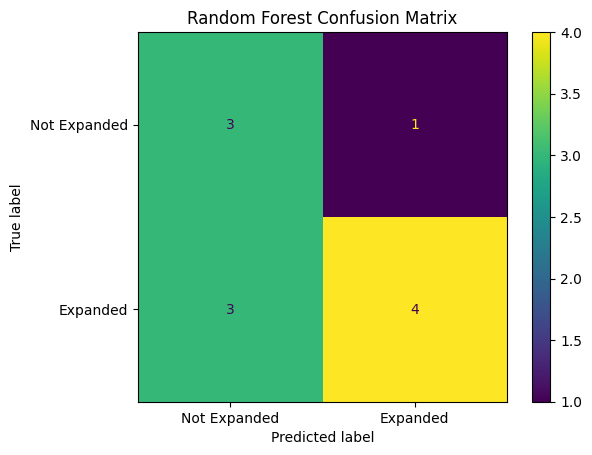


Feature Importance:
                                   Feature  Importance
1  Medicaid Enrollment Change (2013-2016)    0.525353
0       Uninsured Rate Change (2010-2015)    0.474647


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Define predictors and target
X = df_2[["Uninsured Rate Change (2010-2015)", "Medicaid Enrollment Change (2013-2016)"]]
y = df_2["State Medicaid Expansion (2016)_Num"]

# Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Train Random Forest model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predictions
y_pred = rf.predict(X_test)
y_pred_proba = rf.predict_proba(X_test)[:, 1]

# Evaluate model
print("Classification Report:\n", classification_report(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_pred_proba))

# Confusion matrix
ConfusionMatrixDisplay.from_estimator(rf, X_test, y_test, display_labels=["Not Expanded", "Expanded"])
plt.title("Random Forest Confusion Matrix")
plt.show()

# Feature importance
import pandas as pd
importance = pd.DataFrame({
    "Feature": X.columns,
    "Importance": rf.feature_importances_
}).sort_values(by="Importance", ascending=False)
print("\nFeature Importance:\n", importance)


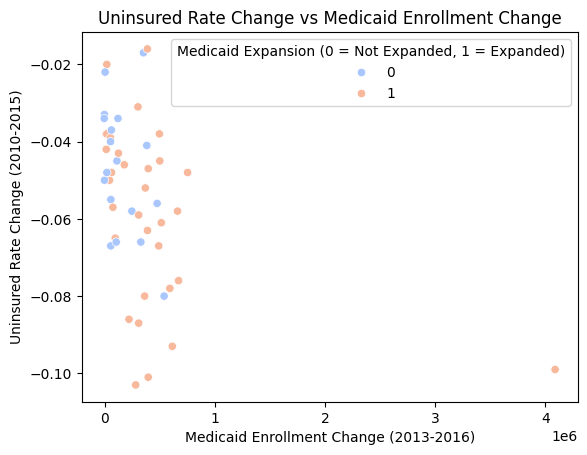

In [ ]:
# Scatterplot for Uninsured Rate Change vs Medicaid Enrollment Change
sns.scatterplot(x="Medicaid Enrollment Change (2013-2016)",
                y="Uninsured Rate Change (2010-2015)",
                hue="State Medicaid Expansion (2016)_Num",
                data=df, palette="coolwarm")
plt.title("Uninsured Rate Change vs Medicaid Enrollment Change")
plt.xlabel("Medicaid Enrollment Change (2013-2016)")
plt.ylabel("Uninsured Rate Change (2010-2015)")
plt.legend(title="Medicaid Expansion (0 = Not Expanded, 1 = Expanded)")
plt.show()
